# Homework #2 (Due 09/17/2020, 11:59pm)
## Maximum Likelihood Learning and Bayesian Inference

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2020**

**Name:** Assaraf David

**Students collaborators:** Ancel Gael, Pellegrin Raphael

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [10]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Description
In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](lotus1.png) |  ![alt](toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](lotus2.png) |  ![alt](toysmith2.png)


In the following, we will ask you to build statistical models to compare these two products using the observed rating. Larger versions of the images are available in the data set accompanying this notebook.



## Part I: A Maximum Likelihood Model
1. **(Model Building)** Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
  where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars. That is, each new rating (a value between 1 and 5) has a categorical distribution $Cat(\theta)$. Represent the observed ratings of an Amazon product as a vector $R = [r_1, r_2, r_3, r_4, r_5]$ where, for example, $r_4$ is the number of $4$-star reviews out of a total of $N$ ratings. Write down the likelihood of $R$. That is, what is $p(R| \theta)$?

  **Note:** The observed ratings for each product should be read off the image files included in the dataset.

### Multinomial Distribution
We denote by $r$ the rating of a new rating. We model $r \sim Cat(\theta)$, where $\theta$ is a 5-dimensional vector and $r$ also. Therefore, with $n$ ratings, the observed ratings of an Amazon product can be written as $\sum_{i=1}^nr^{(i)}$ where the sum is performed element-wise in the vectors. Therefore, we are looking for the probabilities of potential outcomes of $\textbf{several}$ drawings for a random variable that can take one of 5 categories. Since the categorical distribution is a special case of the multinomial distribution with one single drawing, we know that $R| \theta \sim Multi(n, \theta)$.
### Model Likelihood
In the multinomial model, we have, when $$R \sim Multi(n, \theta)$$
\begin{equation*}
\mathbb{P}(R = r) = \mathbb{P}(R_1 = n_1, ..., R_m = n_m) = {\frac  {n!}{n_{1}!\ldots n_{m}!}}\theta_{1}^{{n_{1}}}\ldots \theta_{m}^{{n_{m}}}, \quad \sum_{i=1}^mn_i = n
\end{equation*}

Therefore, here we have, with $n = \sum_{i=1}^5r_i (= 162)$
\begin{equation*}
p(R| \theta) = {\frac  {n!}{r_{1}!\ldots r_{5}!}}\theta_{1}^{{r_{1}}}\ldots \theta_{5}^{{r_{5}}}
\end{equation*}
Therefore, here, the likelihood of the lotus model is: 
\begin{equation*}
p(R| \theta) = \frac{162!}{10!6!10!28!108!}\theta_{1}^{10}\theta_{2}^{6}\theta_{3}^{10}\theta_{4}^{28}\theta_{5}^{108}
\end{equation*}


2. **(Model Fitting)** Find the maximum likelihood estimator of $\theta$ for the Lotus World model; find the MLE of $\theta$ for the Toysmith model. You need to make a reasonably mathematical argument for why your estimate actually maximizes the likelihood (i.e. recall the criteria for a point to be a global optima of a function).

  *Note:* I recommend deriving the MLE using the general expression of the likelihood. That is, derive the posterior using the variable $R$, then afterwards plug in your specific values of $R$ for each product.

## Constrained Optimization

We are looking for the model parameter $\theta$ in $\mathbb{R^5}$ that will maximize the likelihood of the observed data $p(R | \theta)$. Since the function log is strictly monotonous, both problems are equivalent: 
\begin{equation*}
argmax_{\theta \in \mathbb{R^5}} p(R| \theta) \quad \textbf{and} \quad argmax_{\theta \in \mathbb{R^5}} log(p(R| \theta))
\end{equation*}

Therefore, we will solve the problem of maximizing the $\textbf{log likelihood}$. 

There are further constraints we need to further considerate. The solution space in which we are looking for the parameter $\theta$ is not exactly $\mathbb{R^5}$ but the cut-hyperplane $\sum_{i=1}^5\theta_i = 1 \quad and \quad \theta > 0$: this is a $\textbf{constrained optimization}$ problem. 

For now, I will relax the positivity constraint and see how the solution behvaes (if the optimal solution without this positivity constraint verifies $\theta > 0$, we would have solved our problem).

Let us introduce the $\textbf{Lagrangian}$ of our problem, and resolve our $\textbf{free optimization}$ problem: 
\begin{equation*}
\mathcal{L(\theta, \lambda)} = log(p(R| \theta)) + \lambda(\sum_{i=1}^5\theta_i -1) 
\end{equation*}

Therefore, 
\begin{equation*}
argmax_{\theta \in \mathbb{R^5}}\mathcal{L(\theta, \lambda)} = argmax_{\theta \in \mathbb{R^5}, \lambda \in \mathbb{R}}{\sum_{i=1}^5r_ilog(\theta_i)} + \lambda(\sum_{i=1}^5\theta_i -1) 
\end{equation*}
Computing the gradients, we obtain: 
\begin{equation*}
\nabla \mathcal{L(\theta, \lambda)} = [\frac{\theta_1}{r_1} + \lambda, \frac{\theta_2}{r_2}+ \lambda, \frac{\theta_3}{r_3}+ \lambda, \frac{\theta_4}{r_4}+ \lambda, \frac{\theta_5}{r_5}+ \lambda, \sum_{i=1}^5\theta_i -1]^T
\end{equation*}
Therefore, $\nabla \mathcal{L(\theta, \lambda)} = 0 \iff \theta_i = -\lambda*r_i \quad \forall i \in {1, .. , 5} \quad \textit{and}\quad \sum_{i=1}^5\theta_i =1 $

Therefore,
$\sum_{i=1}^5\theta_i =1 \iff \sum_{i=1}^5-\lambda*r_i = 1 \iff \lambda = -\frac{1}{\sum_{i=1}^5r_i} $

$\textbf{Temporary Conclusion: } \forall i \in {1, .., 5}  \quad \theta_i^{argmax} = \frac{r_i}{\sum_{j=1}^5r_j} =  \frac{r_i}{n}$

As we can see (all the $r_i$ are positive), the $\theta_i$ are positive and therefore, we have found solution to the constrained optimization problem. Now remains to find out if we did found a global optima. 

We know that the constraints are affine, if we manage to show that the log-likelihood is concave (as a function of 5 parameters), then we would be certain that we would have found a global optima for our model. 

Let us compute the $\textbf{Hessian of the log-likelihood}$:
\begin{equation*}
\mathcal{H}(log(p(R| \theta))) = diag(-\frac{\theta_i}{r_i^2})
\end{equation*}

Therefore, the Hessian matrix is negative semi-definitie and the log-likelihood is concave: we have found a global optima and in that cas a global maximum for the log-likelihood and then the likelihood. 


$\textbf{Conclusion : }$$\forall i \in {1, .., 5}  \quad \theta_i^{MLE} = \frac{r_i}{\sum_{j=1}^5r_j} = \frac{r_i}{n}$

### Loftus model
\begin{equation*}
\theta_{Loftus}^{MLE} = [0.06, 0.04, 0.06, 0.17, 0.67]
\end{equation*}

### Toysmith Model
\begin{equation*}
\theta_{Toysmith}^{MLE} = [0.14, 0.08, 0.07, 0.11, 0.60]
\end{equation*}

3. **(Model Interpretation)** Based on your MLE of $\theta$'s for both models, do you feel confident deciding if one product is superior to another? Why or why not?

The question to be answered here is, based on our MLE estimation from the previous question, can we infer that one product is consistently better than the other, and if so how consistently can we affirm such assertion. 
One could argue that according to our MLE estimations, wa can assume that the $\textbf{Loftus}$ model is superior to the Toysmith model. However, $\textbf{we do not have enough information to conclude that}$.

Several points need to be explored before concluding:
#### Regarding the data

The MLE have not been computed on the same amount of data: one is computed for 410 ratings and the other is computed for 162 ratings. Several things can happen in that situation:
- The MLE can overfit the data for the Loftus product since we do not know if there is enough data in order to efficiently capture the customer behavior. One way to prevent overfitting could be to regularize the MLE (or insert a prior since we know that there exists a prior that results in the regularized MLE).
- The MLE for the Toysmith product can me 'more consistent' than the one for the Loftus model, meaning that one would have converged to the true parameter whereas the other has not seen enough data in order to converge

#### Regarding the method of computing a point estimate
- We know that the MLE has a Gaussian distribution centered on the true parameter and with a variance depending on the parameter (through the FIM). This is why we need to have a better understanding of the distribution before drawing conclusions based on a point-wise estimate (maybe computed confidence interval through bootstrapping or even compute the FIM and understand the variance on the MLE estimation.


Once we would have considered these problems, we would eventually be able to draw a more informed conclusion. 

## Part II: A Bayesian Model

1. **(Model Building)** Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). What would be an appropriate $\alpha$ for the Dirichlet prior on $\theta$? Recall that the Dirichlet pdf is given by:
$$
p_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

We decided the form of our prior: a Dirichlet prior. What we first need to do is to infer the parameters of the Dirichlet distribution according to our beliefs. Therefore, we are looking for a parameter $\alpha$ such that most reviews will be 5 stars or 1 stars, ie such that the probability distribution of $\theta_1$ and $\theta_5$ will be centered around something like 0.5 and all the others will be relatively close to 0. Let us try with a parameter $\alpha$ = [20, 1, 1, 1, 20].

In [3]:
alpha_parameter = np.array([20, 1, 1, 1, 20])
samples_dirichlet = np.random.dirichlet(alpha_parameter, size = 1000)

Text(0.5,1,'Distribution of the probability of giving 1 star')

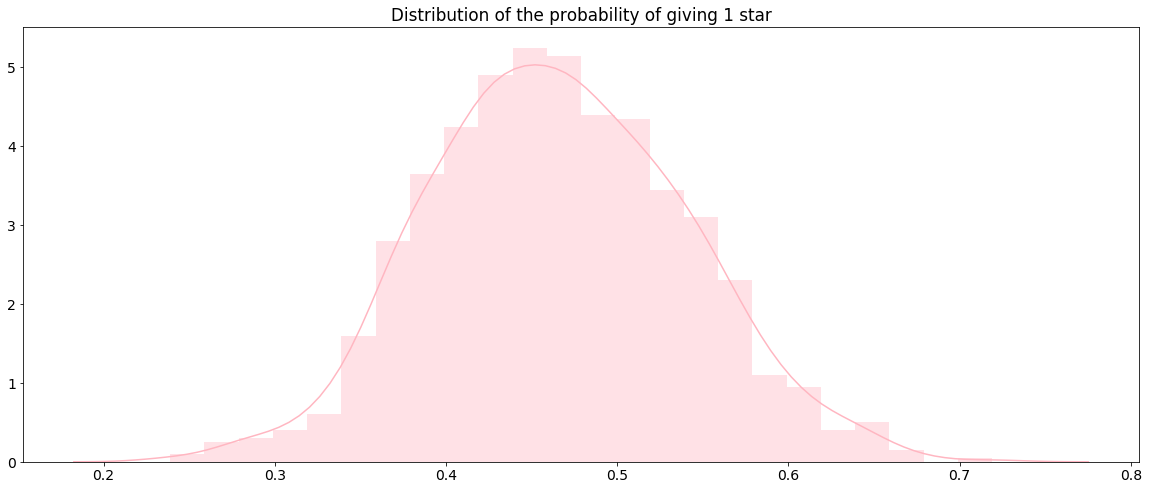

In [28]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (20, 8))
sns.distplot(samples_dirichlet[:, 0], color='lightpink')
plt.title('Distribution of the probability of giving 1 star')

Text(0.5,1,'Distribution of the probability of giving 1 star')

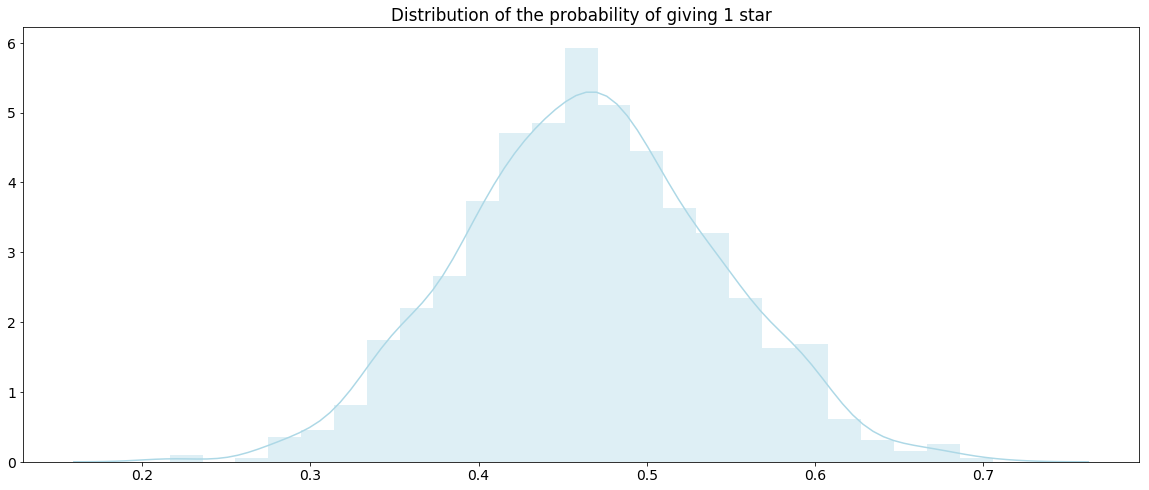

In [30]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (20, 8))
sns.distplot(samples_dirichlet[:, 4], color='lightblue')
plt.title('Distribution of the probability of giving 5 stars')

Text(0.5,1,'Distribution of the probability of giving 2 stars')

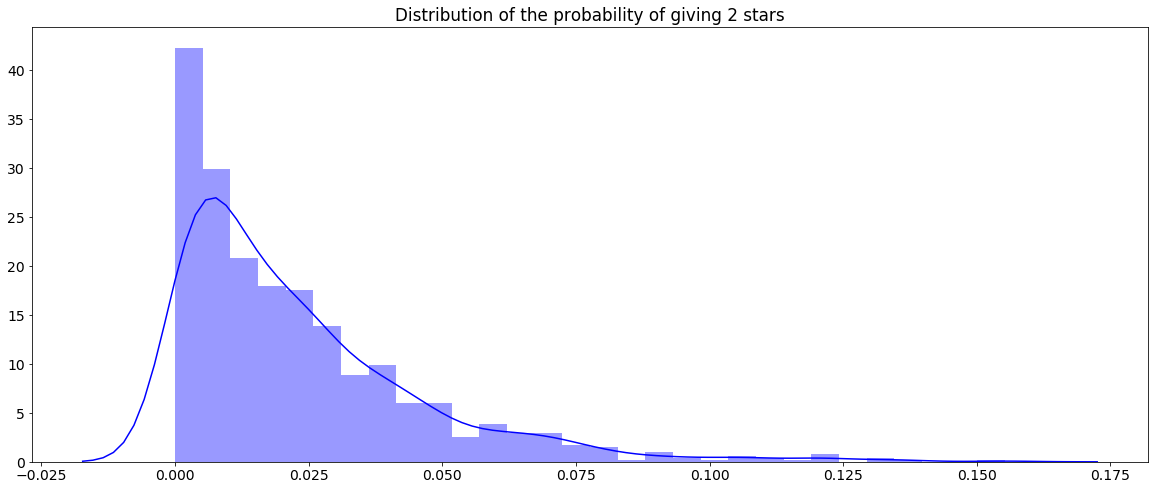

In [31]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (20, 8))
sns.distplot(samples_dirichlet[:, 1], color='blue')
plt.title('Distribution of the probability of giving 2 stars')

I do not want to plot all the distribution of the five parameters but one could check that choosing this $\alpha$ is a way of guaranteeing our prior beliefs. 

2. **(Inference)** Analytically derive the posterior distribution (using the likelihoods you derived in Part I) for each product.

  *Note:* I recommend deriving the posterior using the general expression of a Dirichelet pdf. That is, derive the posterior using the variable $\alpha$, then afterwards plug in your specific values of $\alpha$ when you need to.

We wish to compute the posterior distribution for our model parameter. That is, based on the data ($R$, reflected in the lieklihood) and the prior, we wish to estimate the distribution of $\theta | R$. 
We know that $\theta | R$ is proportionate to $p(R | \theta) * p(\theta)$.
We have:
\begin{equation*}
p(\theta | R) \quad \textit{is proportional to}  \quad {\frac  {n!}{r_{1}!\ldots r_{5}!}}\theta_{1}^{{r_{1}}}\ldots \theta_{5}^{{r_{5}}} * \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}
\end{equation*}
By putting the constants away in a normalization factor and gathering all what remains dependent of $\theta$, we get:
\begin{equation*}
p(\theta | R) \quad \textit{is proportional to}  \quad \prod_{i=1}^k \theta_i^{\alpha_i + r_i- 1}
\end{equation*}
Therefore, the posterior distribution of our model parameter is a $\textbf{Dirichlet Distribution}$, with parameter $\alpha + r$ where both $\alpha$ and $r$ are elements from $\mathbb{R}^5$. We can therefore deduce the normalization constant for the pdf as being $\frac{1}{B(\alpha + r)}$.

#### For the Loftus model
\begin{equation*}
p(\theta_{Loftus} | R) =  \frac{1}{B(\alpha + r_{Loftus})}\theta_1^{29}\theta_2^{6}\theta_3^{10}\theta_4^{28}\theta_5^{127}
\end{equation*}
We know that $B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)}$ and that $\Gamma$ function can be well computed for integers. 
Therefore, $\frac{1}{B(\alpha + r_{Loftus})}$ = $\frac{203!}{29!6!10!28!127!} $
\begin{equation*}
p(\theta_{Loftus} | R) =  \frac{203!}{29!6!10!28!127!}\theta_1^{29}\theta_2^{6}\theta_3^{10}\theta_4^{28}\theta_5^{127}
\end{equation*}
#### For the Toysmith model
\begin{equation*}
p(\theta_{Toysmith} | R) =  \frac{1}{B(\alpha + r_{Toysmith})}\theta_1^{76}\theta_2^{33}\theta_3^{29}\theta_4^{45}\theta_5^{265}
\end{equation*}
We know that $B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)}$ and that $\Gamma$ function can be well computed for integers. 
Therefore, $\frac{1}{B(\alpha + r_{Toysmith})}$ = $\frac{452!}{76!33!29!45!265!} $
\begin{equation*}
p(\theta_{Toysmith} | R) =  \frac{452!}{76!33!29!45!265!}\theta_1^{76}\theta_2^{33}\theta_3^{29}\theta_4^{45}\theta_5^{265}
\end{equation*}

3. **(The Maximum A Posterior Estimate)** Analytically or empirically compute the MAP estimate of $\theta$ for each product, using the $\alpha$'s you chose in Problem 1. How do these estimates compare with the MLE? Just for this problem, compute the MAP estimate of $\theta$ for each product using a Dirichelet prior with hyperparameters $\alpha = [1, 1, 1, 1, 1]$. Make a conjecture about the effect of the prior on the difference between the MAP estimates and the MLE's of $\theta$.

### MAP Estimator
The MAP estimator is computed with the equation $argmax_{\theta \in \mathbb{R}^5, \sum_{i=1}^5\theta_i = 1}p(\theta|R)$.
Therefore, as we did above, we will find the maximizer of the log of the posterior distribution. Removing the constants not depending on $\theta$, our problem becomes the $\textbf{Constrained Optimization}$ problem:
\begin{equation*}
argmax_{\theta \in \mathbb{R}^5, \sum_{i=1}^5\theta_i = 1}\sum_{i=1}^5(\alpha_i+r_i-1)log(\theta_i)
\end{equation*}

We recognize the same optimization problem as the one we did with the likelihood. Without repeating the same arguments, we can therefore conclude that 
\begin{equation*}
\forall i \in {1, .., 5} \quad \theta_i^{MAP} = \frac{\alpha_i+r_i-1}{\sum_{i=1}^5(\alpha_i+r_i-1)}
\end{equation*}
We can see that the MAP estimates of $\theta$ appear as $\textbf{regularized}$ MLE; by including the prior of every parameter in the estimation of this parameter. This allows in particular to prevent the overfitting of the data when estimating the parameter $\theta$.
### Using the $\alpha$ I have chosen
\begin{equation*}
\theta_{Loftus}^{MAP} = [0.145, 0.03, 0.05, 0.14, 0.635]
\end{equation*}
\begin{equation*}
\theta_{Toysmith}^{MAP} = [0.17, 0.07, 0.06, 0.11, 0.59]
\end{equation*}

### Using the new $\alpha$

In [40]:
alpha_parameter_uninformative = np.array([1, 1, 1, 1, 1])
samples_dirichlet_uninformative = np.random.dirichlet(alpha_parameter_uninformative, size = 1000)

Text(0.5,1,'Distribution of the probability of giving 1 stars with the new hyperparameter')

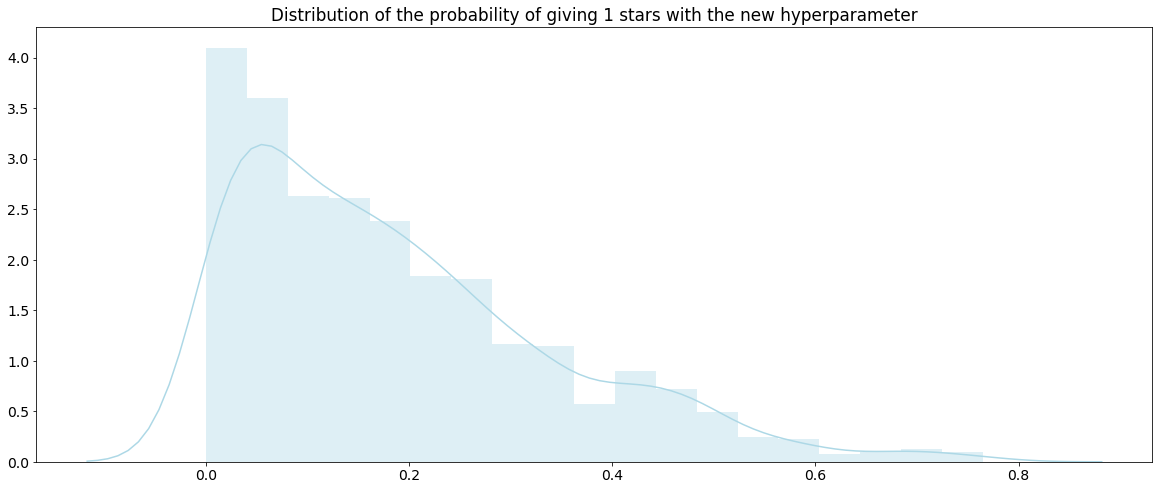

In [42]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (20, 8))
sns.distplot(samples_dirichlet_uninformative[:, 0], color='lightblue')
plt.title('Distribution of the probability of giving 1 stars with the new hyperparameter')

With the new hyperparameter $\alpha$, the prior on the distribution has a uniform effect on every coordinate of the $\theta$ parameter. Also, with $\alpha$ = [1, 1, 1, 1, 1], we can immediatly see that $\textbf{the MAP estimator will be equal to the MLE}$. 
The effect of the prior on the difference between MLE and MAP is that a quite 'homogeneous' prior in terms of coordinates of the parameter $\alpha$ being close will result in a MAP estimator not very different from the MLE. However, a very 'heterogeneous' $\alpha$ parameter will include a regularization term in the MLE that allow to encapsulate our prior beliefs and therefore leading in a different MAP estimator than the MLE.

4. **(The Posterior Mean Estimate)** Analytically or empirically compute the posterior mean estimate of $\theta$ for each product, using the $\alpha$'s you chose in Problem 1. How do these estimates compare with the MAP estimates and the MLE?

We know that the posterior distibution on the parameter $\theta$ is a Dirichlet distribution with the vector parameter $\alpha + r$. We can therefore access the posterior mean estimate easily through the expectation close form for Dirichlet Distriution. \begin{equation*}
\forall i \in {1, ... , 5} \quad \mathbb{E}(\theta_i) = \frac{\alpha_i + r_i}{\sum_{i=1}^5\alpha_i+r_i}
\end{equation*}
### For the Loftus Model
$$\theta_{mean}^{MAP} = [0.15, 0.03, 0.05, 0.14, 0.63]$$
### For the Toysmith Model
$$\theta_{mean}^{MAP} = [0.16, 0.08, 0.07, 0.10, 0.59]$$


I would say that the posterior mean estimate of $\theta$ for each product is relatively close to the MAP estimate for each product. Let us further understand why. We know that several issues can arise when the distribution is atypical. However, when we explore the Dirichlet distirubtion, (q1, Figures 1 and 2), we can see that most of the mass is concentrated around the maximum of the pdf, explaining why the MAP and the mean posterior estimate are relatively close. 

However, there is a $\textbf{significant difference between the mean posterior estimate and the MLE for the Loftus}$ product.
We can see that for the MLE, probabilities od giving low scores are low. For the mean posterior estimate, we include the effect of the prior that tends to givve high probability to low scores, explaining this difference. 

5. **(The Posterior Predictive Estimate)** Sample 1000 rating vectors from the posterior predictive for each product, using the $\alpha$'s you chose in Problem 1. Use the average of the posterior predictive samples to estimate $\theta$. How do these estimates compare with the MAP, MLE, posterior mean estimate of $\theta$?

### For the Loftus model

First, we sample parameters from the posterior. 

In [44]:
samples_parameter_loftus = np.random.dirichlet([30, 7, 11, 29, 128], size = 1000)

Then, we plug these parameters into the likelihood to generate ratings.

In [47]:
samples_ratings_loftus = []
for i in range(1000):
    sample_rating_loftus = np.random.multinomial(1, samples_parameter_loftus[i])
    samples_ratings_loftus.append(sample_rating_loftus)

At this point, wa have a sample of 1000 ratings for the Loftus product. Now, we will estimate the $\theta$ parameter based on this predictive posterior distribution. 

In [51]:
theta_posterior_predictive_loftus = np.mean(samples_ratings_loftus, axis=0)
theta_posterior_predictive_loftus

array([0.156, 0.02 , 0.047, 0.127, 0.65 ])

### For the Toysmith Model

In [53]:
samples_parameter_toysmith = np.random.dirichlet([77, 34, 30, 46, 266], size = 1000)
samples_ratings_toysmith = []
for i in range(1000):
    sample_rating_toysmith = np.random.multinomial(1, samples_parameter_toysmith[i])
    samples_ratings_toysmith.append(sample_rating_toysmith)
theta_posterior_predictive_toysmith = np.mean(samples_ratings_toysmith, axis=0)
theta_posterior_predictive_toysmith

array([0.168, 0.077, 0.068, 0.09 , 0.597])

### Comparisons

We can see that both estimates are closer to the MAP estimator than to the MLE. Indeed, what we have done is compute the MLE of the posterior predictive distribution with the same amount of data. Therefore, we can see that with 1000 samples, the MLE for both products seems consistent since it is really close to the true parameter that sampled the distribution (ie the MAP estimator).

6. **(Model Evaluation)** Compute the 95% credible interval of $\theta$ for each product (*Hint: compute the 95% credible interval for each $\theta_i$, $i=1, \ldots, 5$*). For which product is the posterior mean and MAP estimate more reliable and why? 

We will compute the credible intervals for each product thanks to the posterior probability distribution. 

### For the Loftus product

In [58]:
samples_parameter_loftus = np.random.dirichlet([30, 7, 11, 29, 128], size = 1000)
low_percentiles = []
up_percentiles = []
for i in range(5):
    sample = samples_parameter_loftus[:, i]
    percentile_low = np.percentile(sample, 2.5)
    low_percentiles.append(percentile_low)
    percentile_up = np.percentile(sample, 97.5)
    up_percentiles.append(percentile_up)
    print('The 95% credible interval for theta_' + str(i) + ' is [' + str(percentile_low) + '; ' + str(percentile_up) + ']')


The 95% credible interval for theta_0 is [0.10148486611784503; 0.19672911345381852]
The 95% credible interval for theta_1 is [0.012921357145678592; 0.06079937377161456]
The 95% credible interval for theta_2 is [0.027267267414045355; 0.08729960121205206]
The 95% credible interval for theta_3 is [0.09997718285831945; 0.18935570348098324]
The 95% credible interval for theta_4 is [0.557499741623199; 0.6898895791297794]


$$\theta_{Loftus}^{MAP} = [0.145, 0.03, 0.05, 0.14, 0.635]$$
$$\theta_{mean}^{MAP} = [0.15, 0.03, 0.05, 0.14, 0.63]$$

### For the Toysmith product

In [59]:
samples_parameter_toysmith = np.random.dirichlet([77, 34, 30, 46, 266], size = 1000)
low_percentiles = []
up_percentiles = []
for i in range(5):
    sample = samples_parameter_toysmith[:, i]
    percentile_low = np.percentile(sample, 2.5)
    low_percentiles.append(percentile_low)
    percentile_up = np.percentile(sample, 97.5)
    up_percentiles.append(percentile_up)
    print('The 95% credible interval for theta_' + str(i) + ' is [' + str(percentile_low) + '; ' + str(percentile_up) + ']')


The 95% credible interval for theta_0 is [0.13606492836367298; 0.20438189044392224]
The 95% credible interval for theta_1 is [0.053896940340553756; 0.10365249869391988]
The 95% credible interval for theta_2 is [0.04509979908535243; 0.09163563384021264]
The 95% credible interval for theta_3 is [0.07501348689978479; 0.13009342754844735]
The 95% credible interval for theta_4 is [0.5423837017765127; 0.6318009848407086]


$$\theta_{Toysmith}^{MAP} = [0.17, 0.07, 0.06, 0.11, 0.59]$$
$$\theta_{mean}^{MAP} = [0.16, 0.08, 0.07, 0.10, 0.59]$$


It appears that the posterior mean and MAP estimate are more reliable for the Toysmith product, since the credible intervals for theta are narrower. This comes from the fact that we have more data for Toysmith (the number of ratings appear in the parameters of the dirichlet distribution), therefore leading to being more confident during estimations. 

## Part III: Comparison
1. **(Summarizing Customer Ratings)** Recall that on Amazon, the first customer review statistic displayed for a product is the average rating. Name at least one problem with ranking products based on the average customer rating.

The problems that arise when ranking products based on the average costumer rating are that, $\textbf{in the presence of a low amount of data}$, several problems arise:
- One could easily favor a product on another though the ratings the former had are not significant of a population sample. For instance, one could argue that looking disrepancies between MAP estimate and MLE estimate, the MLE estimate for the Loftus model did overfit the data (and the proposed ranking is precisely the MLE for the model parameter.
- The MLE may not have converged towards the true parameter value (and then the inherent value of the product) 

2. **(Comparison of Point Estimates)** Which point estimate (MAP, MLE, posterior mean or posterior predictive estimate) of $\theta$, if any, would you feel choose to rank the two Amazon products? Why? 

  *Hint: think about which of these estimates are equivalent (if any). If they are not equivalent, what are the special properties of each estimate? What aspect of the data or the model is each estimate good at capturing?*
  
   **Note:** we're not looking for "the correct answer" here. We are looking for a sound decision based on a statistically correct interpretation of your models.

I would consider three estimates equivalent: MAP, Posterior Mean Estimate and the estimate through the Posterior Predictive. On the other hand, the frequentist MLE. 

The special properties of each estimate are that the first group of estimate insert the prior belief and then allows to prevent overfitting through regularization. Therefore, this group of estimate is good to capture patterns in a data when you have unsufficient number of data points. However, the drawback of this approach is that inserting prior belief is subjective and may lead to biases in the model. 

The MLE has the benefit of being consistent, meaning that when the number of data points increase, it will converge towards the true parameter. 

In that case, I would go for the MAP estimator, 